# 오픈소스 SW 활용 기말 프로젝트
#### 32202341 송지윤

### 주제: COVID-19와 cryptocurrency market의 상관 관계 분석 
- 2020년 3월부터 2022년 3월까지의 미국의 COVID pandemic이 암호화폐 시장에 영향을 주었을 것이라 가정한다.
- 미국의 전체 코로나 상황 데이터와 CoinGecko API의 암호화폐 변화 데이터를 비교한다.
- 암호화폐 데이터는 현재 시가총액이 가장 높은 상위 10개의 데이터로 선정한다.

# Data 전처리 및 가공

### OWID의 Data on COVID-19 (coronavirus)
- Download our complete COVID-19 dataset -> CSV file 다운로드 -> owid-covid-data.csv
- https://github.com/owid/covid-19-data/tree/master/public/data


### Data read

In [320]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [303]:
# CSV파일 읽어 오기
df_owid = pd.read_csv('owid-covid-data.csv')

df_owid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318399 entries, 0 to 318398
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    318399 non-null  object 
 1   continent                                   303273 non-null  object 
 2   location                                    318399 non-null  object 
 3   date                                        318399 non-null  object 
 4   total_cases                                 282164 non-null  float64
 5   new_cases                                   309582 non-null  float64
 6   new_cases_smoothed                          308318 non-null  float64
 7   total_deaths                                261272 non-null  float64
 8   new_deaths                                  309633 non-null  float64
 9   new_deaths_smoothed                         308403 non-null  float64
 

### column 확인 및 filtered 데이터프레임 생성
- iso_code : 국제 표준 국가 코드
- location : 국가 이름
- date : 일자
- total_cases : 전체 확진자 수
- population : 인구

In [304]:
df_owid_filtered=df_owid[['iso_code', 'location', 'date', 'total_cases', 'population']]
df_owid_filtered

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-01-03,NaN,41128772.0
1,AFG,Afghanistan,2020-01-04,NaN,41128772.0
2,AFG,Afghanistan,2020-01-05,NaN,41128772.0
3,AFG,Afghanistan,2020-01-06,NaN,41128772.0
4,AFG,Afghanistan,2020-01-07,NaN,41128772.0
...,...,...,...,...,...
318394,ZWE,Zimbabwe,2023-06-10,265161.0,16320539.0
318395,ZWE,Zimbabwe,2023-06-11,265161.0,16320539.0
318396,ZWE,Zimbabwe,2023-06-12,265289.0,16320539.0
318397,ZWE,Zimbabwe,2023-06-13,265289.0,16320539.0


In [305]:
# 데이터프레임에서 미국 데이터를 추출하기 위해 지역 데이터 추출
location = df_owid['location'].unique()
location

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [306]:
# 미국 데이터 프레임 생성
df_usa = df_owid_filtered[df_owid_filtered.location=='United States']

df_usa.head()

,iso_code,location,date,total_cases,population
299596,USA,United States,2020-01-03,NaN,338289856.0
299597,USA,United States,2020-01-04,NaN,338289856.0
299598,USA,United States,2020-01-05,NaN,338289856.0
299599,USA,United States,2020-01-06,NaN,338289856.0
299600,USA,United States,2020-01-07,NaN,338289856.0


In [307]:
# 결측치 제거
df_usa=df_usa.dropna()
df_usa

,iso_code,location,date,total_cases,population
299613,USA,United States,2020-01-20,1.0,338289856.0
299614,USA,United States,2020-01-21,1.0,338289856.0
299615,USA,United States,2020-01-22,1.0,338289856.0
299616,USA,United States,2020-01-23,1.0,338289856.0
299617,USA,United States,2020-01-24,1.0,338289856.0
...,...,...,...,...,...
300850,USA,United States,2023-06-10,103436829.0,338289856.0
300851,USA,United States,2023-06-11,103436829.0,338289856.0
300852,USA,United States,2023-06-12,103436829.0,338289856.0
300853,USA,United States,2023-06-13,103436829.0,338289856.0


In [ ]:
# index 변경
df_usa_indexed=df_usa.set_index('date')
df_usa_indexed

,iso_code,location,total_cases,population
date,,,,
2020-01-20,USA,United States,1.0,338289856.0
2020-01-21,USA,United States,1.0,338289856.0
2020-01-22,USA,United States,1.0,338289856.0
2020-01-23,USA,United States,1.0,338289856.0
2020-01-24,USA,United States,1.0,338289856.0
...,...,...,...,...
2023-06-10,USA,United States,103436829.0,338289856.0
2023-06-11,USA,United States,103436829.0,338289856.0
2023-06-12,USA,United States,103436829.0,338289856.0


In [318]:
# 기간 변경
df_usa_indexed=df_usa_indexed.loc['2020-03-01':'2022-03-31']
df_usa_indexed

In [ ]:
df_usa_total_cases = df_usa_indexed['total_cases']
df_usa_total_cases

date
2020-01-20            1.0
2020-01-21            1.0
2020-01-22            1.0
2020-01-23            1.0
2020-01-24            1.0
                 ...     
2023-06-10    103436829.0
2023-06-11    103436829.0
2023-06-12    103436829.0
2023-06-13    103436829.0
2023-06-14    103436829.0
Name: total_cases, Length: 1242, dtype: float64

<Axes: xlabel='date'>

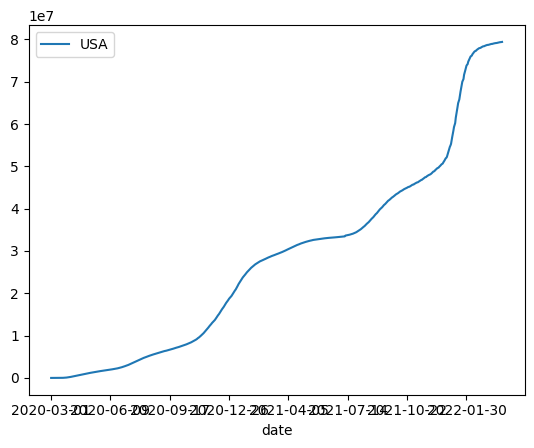

In [326]:
final_df = pd.DataFrame({
    'USA' : df_usa_total_cases
    }, index=df_usa_indexed.index)

final_df.plot.line()

### CoinGecko API의 open API 사용
- https://www.coingecko.com/ko/api/documentation

### Data read

In [ ]:
# 현재 암호화폐별 가격 데이터프레임 생성

# 코인 가격 API endpoint
url_coinprice = "https://api.coingecko.com/api/v3/coins/markets"

# 파라미터 설정
params = {
    "vs_currency": "krw",  
    "order": "market_cap_desc",
    "per_page": 100,       # 한 페이지 당 보여지는 코인 수 
    "page": 1              # 페이지 1의 코인
}

# 받아온 데이터로 데이터프레임 생성
response = requests.get(url_coinprice, params=params)
data_coinprice = response.json()
df_price=pd.DataFrame(data_coinprice)

df_price.head()


,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://assets.coingecko.com/coins/images/1/la...,33826126.00,656348979571884,1,7.103076e+14,1.700862e+13,34133483.00,...,2.100000e+07,21000000.0,81339064.00,-58.41544,2021-11-10T14:24:11.849Z,75594.00,44645.06502,2013-07-05T00:00:00.000Z,None,2023-06-17T14:42:35.390Z
1,ethereum,eth,Ethereum,https://assets.coingecko.com/coins/images/279/...,2213569.00,266108148754281,2,2.661081e+14,9.395623e+12,2245329.00,...,1.202128e+08,NaN,5790811.00,-61.77318,2021-11-08T23:48:45.609Z,489.40,452213.71289,2015-10-20T00:00:00.000Z,"{'times': 86.48817206822628, 'currency': 'btc'...",2023-06-17T14:42:33.255Z
2,tether,usdt,Tether,https://assets.coingecko.com/coins/images/325/...,1276.38,106663935673221,3,1.066639e+14,2.321079e+13,1281.33,...,8.356758e+10,NaN,1499.66,-14.88889,2018-07-24T00:00:00.000Z,656.75,94.34891,2015-03-02T00:00:00.000Z,None,2023-06-17T14:40:00.439Z
3,binancecoin,bnb,BNB,https://assets.coingecko.com/coins/images/825/...,311187.00,48507647673023,4,6.224707e+13,9.287014e+11,317761.00,...,1.579002e+08,200000000.0,792895.00,-60.74698,2021-11-07T10:13:53.906Z,44.95,692288.14367,2017-10-19T00:00:00.000Z,None,2023-06-17T14:42:32.530Z
4,usd-coin,usdc,USD Coin,https://assets.coingecko.com/coins/images/6319...,1277.19,36208214094149,5,3.620821e+13,3.925766e+12,1282.50,...,2.834977e+10,NaN,1466.80,-12.92619,2022-09-30T02:11:16.560Z,1008.25,26.67435,2021-05-19T13:14:05.611Z,None,2023-06-17T14:42:35.516Z


### column 확인 및 filtered 데이터프레임 생성
- id : 암호화폐 id
- symbol : 암호화폐 symbol
- name : 암호화폐 이름
- current_price : 현재 가격
- market_cap : 시가 총액
- market_cap_rank: 시가 총액 순위

In [ ]:
df_price_filtered=df_price[['id', 'symbol', 'name', 'current_price', 'market_cap', 'market_cap_rank']]

# 현재 시가 총액이 가장 높은 상위 10개 암호화폐 데이터프레임 생성
df_cointop10=df_price_filtered.head(10)
df_cointop10

,id,symbol,name,current_price,market_cap,market_cap_rank
0,bitcoin,btc,Bitcoin,33826126.00,656348979571884,1
1,ethereum,eth,Ethereum,2213569.00,266108148754281,2
2,tether,usdt,Tether,1276.38,106663935673221,3
3,binancecoin,bnb,BNB,311187.00,48507647673023,4
4,usd-coin,usdc,USD Coin,1277.19,36208214094149,5
5,ripple,xrp,XRP,613.57,31904383188685,6
6,staked-ether,steth,Lido Staked Ether,2214665.00,16020350390404,7
7,cardano,ada,Cardano,339.97,11918557845912,8
8,dogecoin,doge,Dogecoin,79.55,11121409818197,9
9,tron,trx,TRON,90.98,8191884499130,10


In [ ]:
import datetime

# 기간 설정
start_date = datetime.datetime(2020, 3, 1)
end_date = datetime.datetime(2022, 3, 31)

In [ ]:
# Define the API endpoint
url = "https://api.coingecko.com/api/v3/coins/bitcoin/market_chart/range"

params = {
    "vs_currency": "usd",                      
    "from": int(start_date.timestamp()),
    "to": int(end_date.timestamp())                         
}

# Send a GET request to fetch the historical price data for Bitcoin
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    
    prices = data["prices"]
    df_bitcoin=pd.DataFrame(prices)

else:
    print(f"Error retrieving Bitcoin price data: {response.status_code}")

df_bitcoin


,0,1
0,1583020800000,8552.989119
1,1583107200000,8567.802249
2,1583193600000,8905.876104
3,1583280000000,8756.718577
4,1583366400000,8758.646993
...,...,...
755,1648252800000,44331.777957
756,1648339200000,44510.844218
757,1648425600000,46715.117619
758,1648512000000,46994.879118


In [ ]:
df_bitcoin.columns=['timestamp', 'usd']
df_bitcoin

,timestamp,usd
0,1583020800000,8552.989119
1,1583107200000,8567.802249
2,1583193600000,8905.876104
3,1583280000000,8756.718577
4,1583366400000,8758.646993
...,...,...
755,1648252800000,44331.777957
756,1648339200000,44510.844218
757,1648425600000,46715.117619
758,1648512000000,46994.879118


In [ ]:
for timestamp in df_bitcoin['timestamp']:
    print(f"timestamp:  {timestamp}", end="    ")
    dt_object = datetime.datetime.fromtimestamp(timestamp/1000)
    formatted_date = dt_object.strftime("%Y-%m-%d")
    print(f"{formatted_date}")


timestamp:  1583020800000    2020-03-01
timestamp:  1583107200000    2020-03-02
timestamp:  1583193600000    2020-03-03
timestamp:  1583280000000    2020-03-04
timestamp:  1583366400000    2020-03-05
timestamp:  1583452800000    2020-03-06
timestamp:  1583539200000    2020-03-07
timestamp:  1583625600000    2020-03-08
timestamp:  1583712000000    2020-03-09
timestamp:  1583798400000    2020-03-10
timestamp:  1583884800000    2020-03-11
timestamp:  1583971200000    2020-03-12
timestamp:  1584057600000    2020-03-13
timestamp:  1584144000000    2020-03-14
timestamp:  1584230400000    2020-03-15
timestamp:  1584316800000    2020-03-16
timestamp:  1584403200000    2020-03-17
timestamp:  1584489600000    2020-03-18
timestamp:  1584576000000    2020-03-19
timestamp:  1584662400000    2020-03-20
timestamp:  1584748800000    2020-03-21
timestamp:  1584835200000    2020-03-22
timestamp:  1584921600000    2020-03-23
timestamp:  1585008000000    2020-03-24
timestamp:  1585094400000    2020-03-25


In [ ]:
rows=[]
for timestamp in df_bitcoin['timestamp']:
    dt_object = datetime.datetime.fromtimestamp(timestamp/1000)
    formatted_date = dt_object.strftime("%Y-%m-%d")  # Change the format as desired
    rows.append({"Date": formatted_date})

# Create a DataFrame from the rows list using pd.concat()
df_date = pd.concat([pd.DataFrame(row, index=[0]) for row in rows], ignore_index=True)
df_date

,Date
0,2020-03-01
1,2020-03-02
2,2020-03-03
3,2020-03-04
4,2020-03-05
...,...
755,2022-03-26
756,2022-03-27
757,2022-03-28
758,2022-03-29


In [ ]:
df_bitcoin['timestamp']=df_date['Date']
df_bitcoin

,timestamp,usd
0,2020-03-01,8552.989119
1,2020-03-02,8567.802249
2,2020-03-03,8905.876104
3,2020-03-04,8756.718577
4,2020-03-05,8758.646993
...,...,...
755,2022-03-26,44331.777957
756,2022-03-27,44510.844218
757,2022-03-28,46715.117619
758,2022-03-29,46994.879118


In [ ]:

# Define the API endpoint
url = "https://api.coingecko.com/api/v3/coins/markets"

# Set the required parameters
params = {
    "vs_currency": "usd",
    "order": "market_cap_desc",
    "per_page": 10,  # Fetch top 10 cryptocurrencies
    "page": 1
}

response = requests.get(url, params=params)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Get the list of cryptocurrency symbols and names
    crypto_symbols = [coin["symbol"].upper() for coin in data]
    crypto_names = [coin["name"] for coin in data]
else:
    print("Error occurred while fetching data:", response.text)

# Iterate through each cryptocurrency and fetch the historical prices
for symbol in crypto_symbols:
    history_url = f"https://api.coingecko.com/api/v3/coins/{symbol}/market_chart/range"
    history_params = {
        "vs_currency": "usd",
        "from": int(start_date.timestamp()),
        "to": int(end_date.timestamp())
    }

    # Send a GET request to fetch the historical price data
    history_response = requests.get(history_url, params=history_params)

    if response.status_code == 200:
        history_data = history_response.json()
        print(history_data)

        # prices_data = history_data["prices"]
        # df=pd.DataFrame(prices_data)
        # df.name=f"df_{symbol}"
        
    else:
        print(f"Error retrieving Bitcoin price data: {response.status_code}")


{'error': 'coin not found'}
{'error': 'coin not found'}
{'error': 'coin not found'}
{'error': 'coin not found'}
{'error': 'coin not found'}
{'error': 'coin not found'}
{'error': 'coin not found'}
{'status': {'error_code': 429, 'error_message': "You've exceeded the Rate Limit. Please visit https://www.coingecko.com/en/api/pricing to subscribe to our API plans for higher rate limits."}}
{'status': {'error_code': 429, 'error_message': "You've exceeded the Rate Limit. Please visit https://www.coingecko.com/en/api/pricing to subscribe to our API plans for higher rate limits."}}
{'status': {'error_code': 429, 'error_message': "You've exceeded the Rate Limit. Please visit https://www.coingecko.com/en/api/pricing to subscribe to our API plans for higher rate limits."}}
